In [74]:
## Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ggplot import *
os.chdir('/Users/Air/Desktop/MachineLearn/final_project/')
import sklearn

In [2]:
## running the main script below

In [108]:
run poi_id.py

The accuracy score of the algorithm is: 0.767441860465
The precision score of the algorithm is: 0.0
The recall score of the algorithm is: 0.0


In [105]:
## best estimator as a resut of parameter tuning/ cross validation 
clf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=12, splitter='best')

In [17]:
## clf.feature_importances_

In [109]:
run tester.py

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selector', SelectKBest(k=5, score_func=<function f_classif at 0x10966f140>))],
       transformer_weights=None)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'KNN__metric': ('euclidean', 'manhattan', 'chebyshev', 'minkowski'), 'KNN__n_neighbors': [1, 2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='recall', verbose=0)
	Accuracy: 0.86647	Precision: 0.49904	Recall: 0.39150	F1: 0.43878	F2: 0.40913
	Total predictions: 15000	True positives:  783	False positives:  786	False negatives: 1217	True negatives: 12214



In [86]:
## investigating the confusion matrix
sklearn.metrics.confusion_matrix(labels_test, predicted, labels=None)

array([[33,  4],
       [ 6,  0]])

In [90]:
## checking which features have been selected as a result of selectKBest
selector.get_support()

array([ True,  True,  True, False, False, False,  True,  True, False], dtype=bool)

In [91]:
## scores related to all features in selectKBest
selector.scores_

array([  9.32492268,  10.97716328,   3.903868  ,   3.48558479,
         3.66938716,   2.96112262,   7.79264219,  13.02958944,   2.77410815])

In [22]:
## defining functions for general exploration of the dataset
def get_enron_employees(dict):
    count = 1
    for i in dict.keys():
        print count, i
        count = count + 1
        
def get_features(dict):
    count = 1
    for i in dict[dict.keys()[0]].keys():
        print count, i
        count = count + 1
def get_pois(dict):
    count = 1
    for i in dict.keys():
        if dict[i]['poi']==True:
            print count, i
            count = count + 1

In [23]:
get_enron_employees(data_dict)

1 METTS MARK
2 BAXTER JOHN C
3 ELLIOTT STEVEN
4 CORDES WILLIAM R
5 HANNON KEVIN P
6 MORDAUNT KRISTINA M
7 MEYER ROCKFORD G
8 MCMAHON JEFFREY
9 HORTON STANLEY C
10 PIPER GREGORY F
11 HUMPHREY GENE E
12 UMANOFF ADAM S
13 BLACHMAN JEREMY M
14 SUNDE MARTIN
15 GIBBS DANA R
16 LOWRY CHARLES P
17 COLWELL WESLEY
18 MULLER MARK S
19 JACKSON CHARLENE R
20 WESTFAHL RICHARD K
21 WALTERS GARETH W
22 WALLS JR ROBERT H
23 KITCHEN LOUISE
24 CHAN RONNIE
25 BELFER ROBERT
26 SHANKMAN JEFFREY A
27 WODRASKA JOHN
28 BERGSIEKER RICHARD P
29 URQUHART JOHN A
30 BIBI PHILIPPE A
31 RIEKER PAULA H
32 WHALEY DAVID A
33 BECK SALLY W
34 HAUG DAVID L
35 ECHOLS JOHN B
36 MENDELSOHN JOHN
37 HICKERSON GARY J
38 CLINE KENNETH W
39 LEWIS RICHARD
40 HAYES ROBERT E
41 MCCARTY DANNY J
42 KOPPER MICHAEL J
43 LEFF DANIEL P
44 LAVORATO JOHN J
45 BERBERIAN DAVID
46 DETMERING TIMOTHY J
47 WAKEHAM JOHN
48 POWERS WILLIAM
49 GOLD JOSEPH
50 BANNANTINE JAMES M
51 DUNCAN JOHN H
52 SHAPIRO RICHARD S
53 SHERRIFF JOHN R
54 SHELBY REX
55 L

In [24]:
get_pois(data_dict)

1 HANNON KEVIN P
2 COLWELL WESLEY
3 RIEKER PAULA H
4 KOPPER MICHAEL J
5 SHELBY REX
6 DELAINEY DAVID W
7 LAY KENNETH L
8 BOWEN JR RAYMOND M
9 BELDEN TIMOTHY N
10 FASTOW ANDREW S
11 CALGER CHRISTOPHER F
12 RICE KENNETH D
13 SKILLING JEFFREY K
14 YEAGER F SCOTT
15 HIRKO JOSEPH
16 KOENIG MARK E
17 CAUSEY RICHARD A
18 GLISAN JR BEN F


In [25]:
get_features(data_dict)

1 to_messages
2 deferral_payments
3 expenses
4 poi
5 deferred_income
6 email_address
7 long_term_incentive
8 fraction_emails_from_poi
9 restricted_stock_deferred
10 shared_receipt_with_poi
11 loan_advances
12 from_messages
13 other
14 director_fees
15 bonus
16 total_stock_value
17 from_poi_to_this_person
18 from_this_person_to_poi
19 restricted_stock
20 salary
21 total_payments
22 fraction_emails_to_poi
23 exercised_stock_options


In [26]:
## turning the python dictionary into a pandas dataframe
enron_fin_data_frame = pd.DataFrame.from_dict(data_dict, orient = 'index').replace("NaN", np.nan)

In [27]:
## checking for missing values in the dataset
enron_fin_data_frame.isnull().sum()

to_messages                   59
deferral_payments            107
expenses                      51
poi                            0
deferred_income               97
email_address                 34
long_term_incentive           80
fraction_emails_from_poi       0
restricted_stock_deferred    128
shared_receipt_with_poi       59
loan_advances                142
from_messages                 59
other                         53
director_fees                129
bonus                         64
total_stock_value             20
from_poi_to_this_person       59
from_this_person_to_poi       59
restricted_stock              36
salary                        51
total_payments                21
fraction_emails_to_poi         0
exercised_stock_options       44
dtype: int64

In [28]:
## plots within ipython notebook window
%matplotlib inline

In [29]:
## Some exploratory analysis. lotting graphs to detect outliers

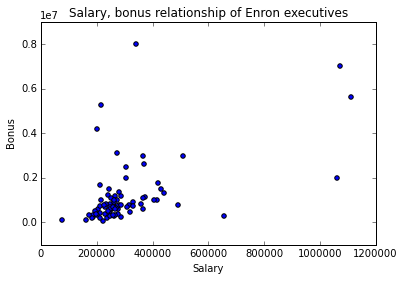

In [30]:
plt.scatter(np.array(enron_fin_data_frame['salary']), np.array(enron_fin_data_frame['bonus']))
plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.title("Salary, bonus relationship of Enron executives")

Saving 11.0 x 8.0 in image.


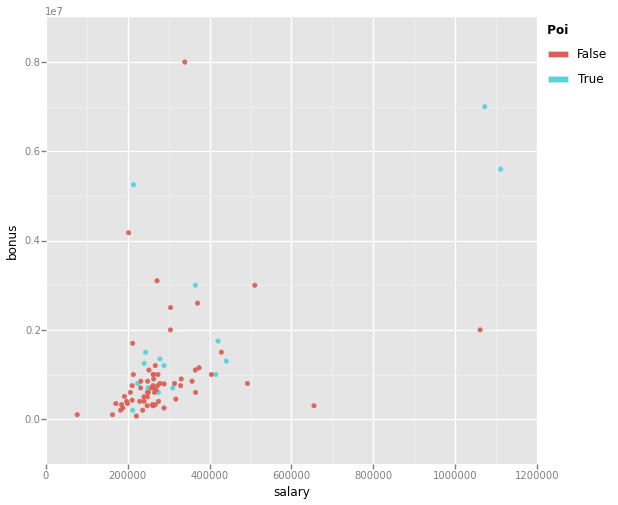

<ggplot: (279761933)>

In [31]:
p = ggplot(enron_fin_data_frame, aes(x='salary', y = 'bonus', color = 'poi')) +\
    geom_point(alpha = 0.95, size = 20)
ggsave(p, "scatter1.png")
p

Saving 11.0 x 8.0 in image.


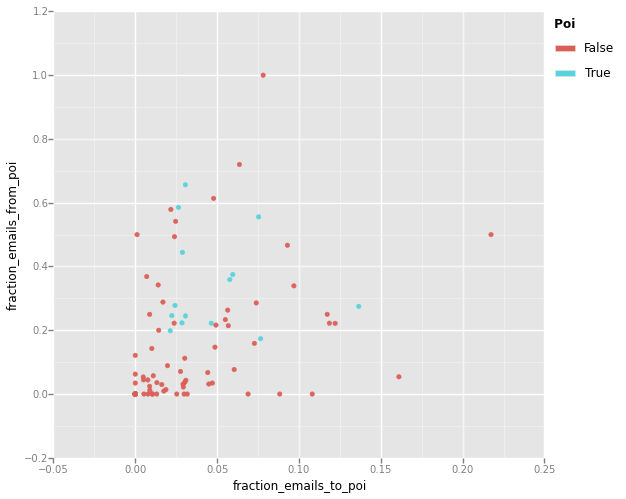

<ggplot: (281491861)>

In [32]:
p2 = ggplot(enron_fin_data_frame, aes(x='fraction_emails_to_poi', y = 'fraction_emails_from_poi', color = 'poi')) +\
    geom_point(alpha = 0.95)
ggsave(p2, "scatter2.png")
p2

Saving 11.0 x 8.0 in image.


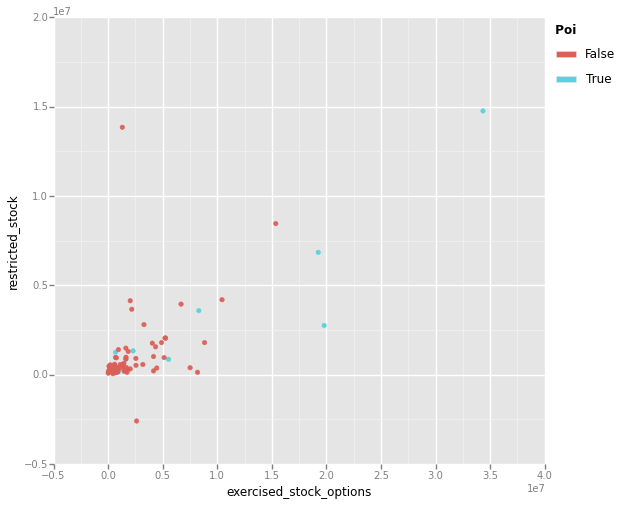

<ggplot: (281491953)>

In [33]:
p3 = ggplot(enron_fin_data_frame, aes(x='exercised_stock_options', y = 'restricted_stock', color = 'poi')) +\
    geom_point(alpha = 0.95)
ggsave(p3, "scatter3.png")  
p3

In [34]:
### list of features to help plotting
'''
Available features in dataset:
1 to_messages
2 deferral_payments
3 expenses
4 poi
5 deferred_income
6 email_address
7 long_term_incentive
8 fraction_emails_from_poi
9 restricted_stock_deferred
10 shared_receipt_with_poi
11 loan_advances
12 from_messages
13 other
14 director_fees
15 bonus
16 total_stock_value
17 from_poi_to_this_person
18 from_this_person_to_poi
19 restricted_stock
20 salary
21 total_payments
22 fraction_emails_to_poi
23 exercised_stock_options
'''

'\nAvailable features in dataset:\n1 to_messages\n2 deferral_payments\n3 expenses\n4 poi\n5 deferred_income\n6 email_address\n7 long_term_incentive\n8 fraction_emails_from_poi\n9 restricted_stock_deferred\n10 shared_receipt_with_poi\n11 loan_advances\n12 from_messages\n13 other\n14 director_fees\n15 bonus\n16 total_stock_value\n17 from_poi_to_this_person\n18 from_this_person_to_poi\n19 restricted_stock\n20 salary\n21 total_payments\n22 fraction_emails_to_poi\n23 exercised_stock_options\n'

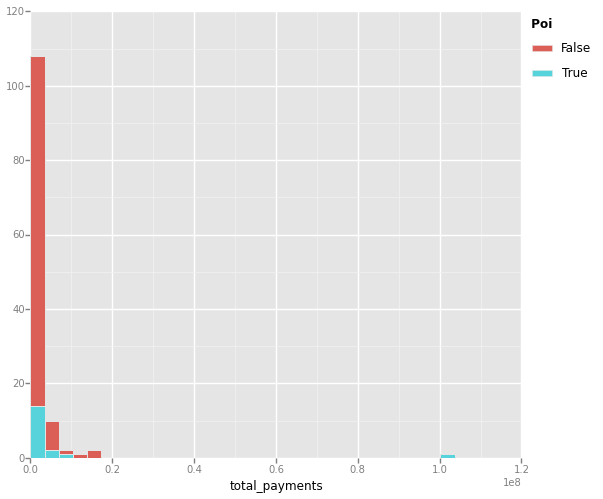

<ggplot: (284557577)>

In [80]:
## investigating distributions of variables
ggplot(enron_fin_data_frame, aes(x='total_payments', fill = 'poi')) +\
    geom_histogram()

In [7]:
## investigating predicted labels and original labels
predicted

array([ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.])

In [8]:
labels_test

[0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
## printing features 
count = 0
for i in predicted:
    if i == 1.:
        print features_test[count]
    count = count + 1   

In [104]:
count = 0
for i in predicted:
    if i == 1.:
        print features_test[count]
    count = count + 1    

[ 0.26315789]
[ 0.2]
[ 0.27777778]
[ 0.23333333]


In [78]:
sklearn.metrics.confusion_matrix(labels_test, predicted, labels=None)

array([[37,  0],
       [ 3,  2]])

In [26]:
count = 0
for i in labels_train:
    if i == 1.:
        print features_train[count]
    count = count + 1 

[ 0.]
[ 0.55555556]
[ 0.24489796]
[ 0.58536585]
[ 0.19843597]
[ 0.275]
[ 0.44444444]
[ 0.375]
[ 0.2231405]
[ 0.35897436]
[ 0.65625]
[ 0.]
[ 0.]
[ 0.24590164]
[ 0.17361111]


In [88]:
enron_fin_data_frame[enron_fin_data_frame.poi==True]

,to_messages,deferral_payments,expenses,poi,deferred_income,email_address,long_term_incentive,fraction_emails_from_poi,restricted_stock_deferred,shared_receipt_with_poi,...,director_fees,bonus,total_stock_value,from_poi_to_this_person,from_this_person_to_poi,restricted_stock,salary,total_payments,fraction_emails_to_poi,exercised_stock_options
BELDEN TIMOTHY N,7991,2144013,17355,True,-2334434,tim.belden@enron.com,NaN,0.223140,NaN,5521,...,NaN,5249999,1110705,228,108,157569,213999,5501630,0.028532,953136
BOWEN JR RAYMOND M,1858,NaN,65907,True,-833,raymond.bowen@enron.com,974293,0.555556,NaN,1593,...,NaN,1350000,252055,140,15,252055,278601,2669589,0.075350,NaN
CALGER CHRISTOPHER F,2598,NaN,35818,True,-262500,christopher.calger@enron.com,375304,0.173611,NaN,2188,...,NaN,1250000,126027,199,25,126027,240189,1639297,0.076597,NaN
CAUSEY RICHARD A,1892,NaN,30674,True,-235000,richard.causey@enron.com,350000,0.244898,NaN,1585,...,NaN,1000000,2502063,58,12,2502063,415189,1868758,0.030655,NaN
COLWELL WESLEY,1758,27610,16514,True,-144062,wes.colwell@enron.com,NaN,0.275000,NaN,1132,...,NaN,1200000,698242,240,11,698242,288542,1490344,0.136519,NaN
DELAINEY DAVID W,3093,NaN,86174,True,NaN,david.delainey@enron.com,1294981,0.198436,NaN,2097,...,NaN,3000000,3614261,66,609,1323148,365163,4747979,0.021339,2291113
FASTOW ANDREW S,NaN,NaN,55921,True,-1386055,andrew.fastow@enron.com,1736055,0.000000,NaN,NaN,...,NaN,1300000,1794412,NaN,NaN,1794412,440698,2424083,0.000000,NaN
GLISAN JR BEN F,873,NaN,125978,True,NaN,ben.glisan@enron.com,71023,0.375000,NaN,874,...,NaN,600000,778546,52,6,393818,274975,1272284,0.059565,384728
HANNON KEVIN P,1045,NaN,34039,True,-3117011,kevin.hannon@enron.com,1617011,0.656250,NaN,1035,...,NaN,1500000,6391065,32,21,853064,243293,288682,0.030622,5538001
HIRKO JOSEPH,NaN,10259,77978,True,NaN,joe.hirko@enron.com,NaN,0.000000,NaN,NaN,...,NaN,NaN,30766064,NaN,NaN,NaN,NaN,91093,0.000000,30766064


In [22]:
features_test

[array([    0.,     0.,     0.,     0.,     0.,     0.,  1413.,     0.,
            0.,     0.,     0.]),
 array([  1.30724000e+05,   1.00000000e+00,   7.81250000e-02,
          2.28276800e+06,   2.28276800e+06,   0.00000000e+00,
          4.99400000e+03,   1.19000000e+02,   0.00000000e+00,
          2.28276800e+06,   2.28276800e+06]),
 array([  4.92375000e+05,   2.20022002e-02,   2.93443375e-02,
          8.83191300e+06,   8.83191300e+06,   8.00000000e+05,
          5.11240000e+04,   1.40100000e+03,   8.00000000e+05,
          8.83191300e+06,   8.83191300e+06]),
 array([  1.11125800e+06,   2.77777778e-01,   2.42624759e-02,
          1.92500000e+07,   2.60936720e+07,   5.60000000e+06,
          2.93360000e+04,   2.04200000e+03,   5.60000000e+06,
          2.60936720e+07,   1.92500000e+07]),
 array([  440698.,        0.,        0.,        0.,  1794412.,  1300000.,
           55921.,        0.,  1300000.,  1794412.,        0.]),
 array([  2.13625000e+05,   2.00000000e-01,   1.43123833e-0